# Polynomial Regression

### Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### Load Data

In [2]:
df = pd.read_csv("Ice_cream selling data.csv")
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


## Exploratory Data Analysis (EDA)

In [3]:
df.shape

(49, 2)

In [4]:
df.describe()

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 912.0 bytes


In [6]:
df.isnull().sum()

Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64

- Temperature (°C): Represents temperature in degrees Celsius, stored as a float.
- Ice Cream Sales (units): Represents the number of ice cream units sold, also stored as a float.
- **Non-Null Values: Both columns contain 49 non-null values, indicating there are no missing values in the dataset.**

In [7]:
# sns.heatmap(correlation, annot=True, cmap='coolwarm')
# plt.title("Correlation Matrix Heatmap")
# plt.show()

## Spliting data into X and y

In [8]:
X = df['Temperature (°C)']
y = df['Ice Cream Sales (units)']

In [9]:
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (49,)
Shape of y =  (49,)


<Axes: xlabel='Temperature (°C)', ylabel='Ice Cream Sales (units)'>

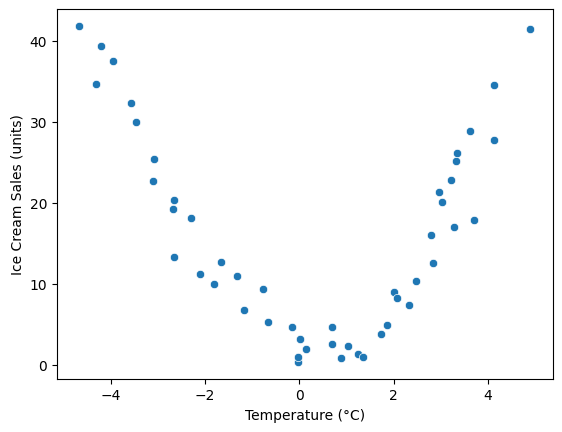

In [10]:
sns.scatterplot(data=df, x=X, y=y)

- Polynomial Regression: This is a relationship between the variables is non-linear.

## Model Selection and Training

In [11]:
# Spliting data into test train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [12]:
# Reshape because we want 2D array
if isinstance(X_train, pd.Series):
    X_train = X_train.to_frame()
    X_test = X_test.to_frame()

## Polynomial Degree Selection

In [13]:
# Create pipeline
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('model', LinearRegression())
])

# Define hyperparameter grid
param_grid = {'poly_features__degree': [1, 2, 3, 4, 5]}

# Set up GridSearchCV
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')

# Fit the model
grid.fit(X_train.values.reshape(-1, 1), y_train)

# Best polynomial degree
print(f"Best polynomial degree: {grid.best_params_['poly_features__degree']}")


Best polynomial degree: 4


In [14]:
poly_reg = PolynomialFeatures(degree=4)
poly_reg.fit(X_train)
X_train_poly = poly_reg.transform(X_train)
X_test_poly = poly_reg.transform(X_test)
X_train_poly.shape

(39, 5)

In [15]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

## Evaluation Metrics
- Evaluate the model using metrics like Mean Squared Error (MSE) and R² score.

In [16]:
# Evaluate the model
accuracy = model.score(X_test_poly, y_test)
print(f"\nModel R^2 Score: {accuracy:.2f}")


Model R^2 Score: 0.95


In [17]:
# predicted values and mean squared error
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
print(f"\n Mean Squared error: {mse:.2f}")


 Mean Squared error: 11.00


#### Degree=2
**High R² Score (0.94):**
- An R² score of 0.94 indicates that 94% of the variance in ice cream sales can be explained by the temperature. This suggests a strong relationship between the two variables.

**Mean Squared Error (MSE = 12.96):**
- A mean squared error of 12.96 means that, on average, the squared differences between predicted and actual sales are around 12.96.

---------------------------------------------------------------------------------------------------------------------------------------
### **After Using Polynomial Degree Selection degree=4**
**High R² Score (0.95):**
- An R² score of 0.95 indicates that 94% of the variance in ice cream sales can be explained by the temperature. This suggests a strong relationship between the two variables.

**Mean Squared Error (MSE = 11.00):**
- A mean squared error of 11.00 means that, on average, the squared differences between predicted and actual sales are around 11.00.


In [18]:
reshape_X = X.values.reshape(-1, 1)

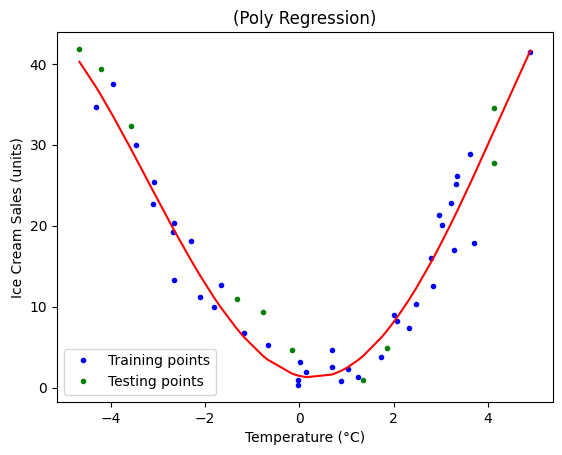

In [19]:
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.plot(X, model.predict(poly_reg.fit_transform(reshape_X)), c="r")
plt.title("(Poly Regression)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.legend()
plt.show()

##  Apply Simple Linear Regression on same Data

In [20]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
Ly_pred = model.predict(X_test)
model.score(X_test, y_test)

-0.10321470795210086

/home/kamlesh/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


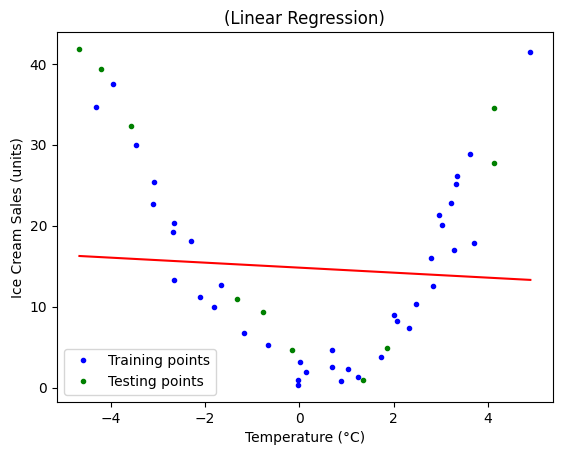

In [22]:
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.plot(X,model.predict(reshape_X), c="r")
plt.title("(Linear Regression)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.legend()
plt.show()